In [14]:
import pandas as pd  
from math import sqrt 
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv('../Data/train.csv', sep=',')
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)  
data.isnull().sum()
    

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
data['FareBin'] = pd.qcut(data['Fare'], 4)
data['AgeBin'] = pd.cut(data['Age'].astype(int), 6)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBin,AgeBin
0,0,3,male,22.0,1,0,7.2500,S,"(-0.001, 7.91]","(13.333, 26.667]"
1,1,1,female,38.0,1,0,71.2833,C,"(31.0, 512.329]","(26.667, 40.0]"
2,1,3,female,26.0,0,0,7.9250,S,"(7.91, 14.454]","(13.333, 26.667]"
3,1,1,female,35.0,1,0,53.1000,S,"(31.0, 512.329]","(26.667, 40.0]"
4,0,3,male,35.0,0,0,8.0500,S,"(7.91, 14.454]","(26.667, 40.0]"


In [18]:
label = LabelEncoder()
data['Labeled_AgeBin'] = label.fit_transform(data['AgeBin'])
data['Labeled_FareBin'] = label.fit_transform(data['FareBin'])
data['FamilySize'] = data['Parch']+ data['SibSp']+1
data['IsAlone'] = 1
data['IsAlone'].loc[data['FamilySize'] > 1] = 0
data['Sex'] = label.fit_transform(data['Sex'])
data['Embarked'] = label.fit_transform(data['Embarked'])
print(data['Embarked'].unique())
data.head(5)

[2 0 1]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBin,AgeBin,Labeled_AgeBin,Labeled_FareBin,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,"(-0.001, 7.91]","(13.333, 26.667]",1,0,2,0
1,1,1,0,38.0,1,0,71.2833,0,"(31.0, 512.329]","(26.667, 40.0]",2,3,2,0
2,1,3,0,26.0,0,0,7.9250,2,"(7.91, 14.454]","(13.333, 26.667]",1,1,1,1
3,1,1,0,35.0,1,0,53.1000,2,"(31.0, 512.329]","(26.667, 40.0]",2,3,2,0
4,0,3,1,35.0,0,0,8.0500,2,"(7.91, 14.454]","(26.667, 40.0]",2,1,1,1


In [19]:
data = pd.get_dummies(data)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Labeled_AgeBin,Labeled_FareBin,...,"FareBin_(-0.001, 7.91]","FareBin_(7.91, 14.454]","FareBin_(14.454, 31.0]","FareBin_(31.0, 512.329]","AgeBin_(-0.08, 13.333]","AgeBin_(13.333, 26.667]","AgeBin_(26.667, 40.0]","AgeBin_(40.0, 53.333]","AgeBin_(53.333, 66.667]","AgeBin_(66.667, 80.0]"
0,0,3,1,22.0,1,0,7.2500,2,1,0,...,True,False,False,False,False,True,False,False,False,False
1,1,1,0,38.0,1,0,71.2833,0,2,3,...,False,False,False,True,False,False,True,False,False,False
2,1,3,0,26.0,0,0,7.9250,2,1,1,...,False,True,False,False,False,True,False,False,False,False
3,1,1,0,35.0,1,0,53.1000,2,2,3,...,False,False,False,True,False,False,True,False,False,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,2,1,...,False,True,False,False,False,False,True,False,False,False
887,1,1,0,19.0,0,0,30.0000,2,1,2,...,False,False,True,False,False,True,False,False,False,False
888,0,3,0,28.0,1,2,23.4500,2,2,2,...,False,False,True,False,False,False,True,False,False,False
889,1,1,1,26.0,0,0,30.0000,0,1,2,...,False,False,True,False,False,True,False,False,False,False


In [20]:
y = data['Survived']
data= data[['Pclass', 'Sex', 'Embarked', 'Labeled_AgeBin', 'Labeled_FareBin' , 'FamilySize', 'IsAlone']]

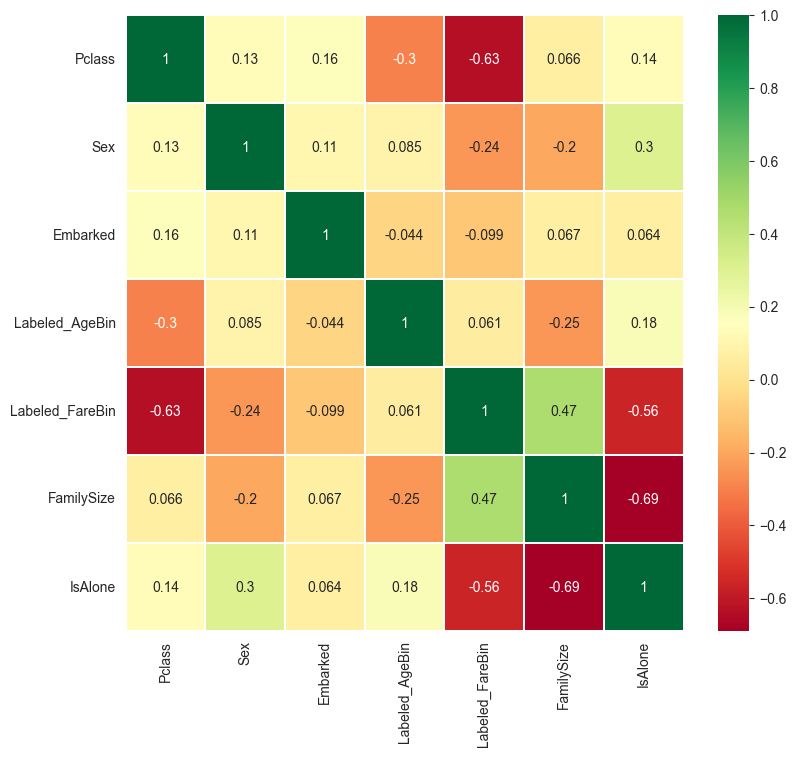

In [21]:
sb.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.25)
log_regression_alg = LogisticRegression()
log_regression_alg.fit(x_train, y_train)
test_predictions = log_regression_alg.predict(x_test)
precision, recall, _, _ = score(y_test, test_predictions, pos_label=1, average='binary')
accuracy = round((test_predictions==y_test).sum() / len(test_predictions),3)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), accuracy))

Precision: 0.735 / Recall: 0.735 / Accuracy: 0.803


In [23]:
prob_test_predictions =  log_regression_alg.predict_proba(x_test)
#test_predictions =  log_regression_alg.predict(x_test)

#test_predictions
prob_test_predictions


array([[0.19542997, 0.80457003],
       [0.37102352, 0.62897648],
       [0.92604126, 0.07395874],
       [0.25366487, 0.74633513],
       [0.88175269, 0.11824731],
       [0.88487297, 0.11512703],
       [0.82070481, 0.17929519],
       [0.32014549, 0.67985451],
       [0.26123532, 0.73876468],
       [0.24914176, 0.75085824],
       [0.95459606, 0.04540394],
       [0.26123532, 0.73876468],
       [0.54253932, 0.45746068],
       [0.42324545, 0.57675455],
       [0.12986931, 0.87013069],
       [0.16420255, 0.83579745],
       [0.84088859, 0.15911141],
       [0.86281309, 0.13718691],
       [0.28970281, 0.71029719],
       [0.40531485, 0.59468515],
       [0.92604126, 0.07395874],
       [0.92604126, 0.07395874],
       [0.25963019, 0.74036981],
       [0.76978999, 0.23021001],
       [0.89872455, 0.10127545],
       [0.62594238, 0.37405762],
       [0.81676395, 0.18323605],
       [0.73161893, 0.26838107],
       [0.95028294, 0.04971706],
       [0.89872455, 0.10127545],
       [0.

In [24]:
prob_test_predictions =  log_regression_alg.predict_proba(x_test)[:,1]
print(prob_test_predictions)
bin_class_1 = (prob_test_predictions >=0.5)
print(bin_class_1)

[0.80457003 0.62897648 0.07395874 0.74633513 0.11824731 0.11512703
 0.17929519 0.67985451 0.73876468 0.75085824 0.04540394 0.73876468
 0.45746068 0.57675455 0.87013069 0.83579745 0.15911141 0.13718691
 0.71029719 0.59468515 0.07395874 0.07395874 0.74036981 0.23021001
 0.10127545 0.37405762 0.18323605 0.26838107 0.04971706 0.10127545
 0.03843149 0.26247841 0.87024304 0.59468515 0.65916065 0.90271345
 0.06942846 0.10180574 0.46650667 0.94977277 0.36524643 0.11824731
 0.10127545 0.13856879 0.1215467  0.91844373 0.07395874 0.27840916
 0.71009248 0.10127545 0.77760049 0.32592727 0.8894381  0.79960648
 0.10180574 0.15911141 0.30556271 0.07395874 0.73295118 0.095244
 0.34128378 0.12998044 0.10180574 0.73295118 0.10127545 0.1215467
 0.13718691 0.05238308 0.16949357 0.90961411 0.73295118 0.17929519
 0.24129699 0.10127545 0.81050369 0.50831832 0.91844373 0.13856879
 0.36524643 0.15911141 0.15021124 0.73876468 0.91607065 0.8260426
 0.07395874 0.15911141 0.18498233 0.24586076 0.10015605 0.79471137

In [25]:
compare = (bin_class_1 == test_predictions).all()
compare

True

In [26]:
bin_class_2 = (prob_test_predictions >=0.3).astype(int)
precision, recall, _, _ = score(y_test, bin_class_2, pos_label=1, average='binary')
accuracy = round((bin_class_2==y_test).sum() / len(bin_class_2),3)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), accuracy))


Precision: 0.683 / Recall: 0.855 / Accuracy: 0.798
